In [1]:
%load_ext autoreload
%autoreload 2
import copy

In [92]:
# Initialize nodes
graph_main = {
    0: {1: 1, 2: 3, 3: 3},
    1: {0: 1, 2: 1, 4: 4, 5: 2},
    2: {0: 3, 1: 1, 3: 1, 4: 1, 5: 1, 6: 2},
    3: {0: 3, 2: 1, 5: 2, 6: 3, 7: 1},
    4: {2: 1, 8: 2},
    5: {2: 1, 3: 2, 8: 1, 9: 7},
    6: {2: 2, 3: 3, 8: 3, 9: 2},
    7: {3: 1, 9: 4},
    8: {4: 2, 5: 1, 6: 3},
    9: {5: 7, 6: 2, 7: 4}
}
node_positions = {
    0: (0, 0),
    1: (3, 3),
    2: (3, 0),
    3: (3, -3),
    4: (6, 3),
    5: (6, 0),
    6: (6, -3),
    7: (6, -6),
    8: (9, 0),
    9: (9, -6),
}

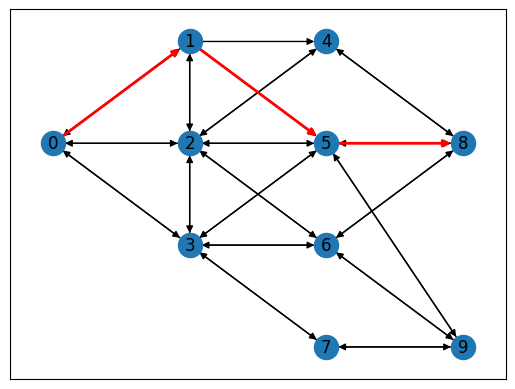

The shortest distance from node 0 to node 8 is 4.0
And this is the path: [0, 1, 5, 8]


In [30]:
from ShortestPath_V0 import ShortestPath

graph = copy.deepcopy(graph_main)

start_node = 0
target_node = 8
model = ShortestPath()
distance, path = model.fit(graph, start_node, target_node)

model.graph_plotting(given_path=path, pos=node_positions)
print(f"The shortest distance from node {start_node} to node {target_node} is {distance}")
print(f"And this is the path: {path}")

In [31]:
from ShortestPath_V1 import ShortestPath

graph = copy.deepcopy(graph_main)

start_node = 0
target_node = 8

model = ShortestPath()
model.fit_flow(graph_=graph, pos=node_positions, start=start_node, target=target_node, flow=100, step=20)

4.0 [0, 1, 5, 8]
5.5 [0, 1, 2, 4, 8]
6.5 [0, 2, 5, 8]
7.25 [0, 3, 5, 8]
8.25 [0, 1, 2, 4, 8]


In [111]:
from Dataloader import Dataloader
from ShortestPath_V2 import ShortestPath
import pandas as pd

data = pd.read_csv("Network/Network.txt")
data = data.iloc[:, :]
dataloader = Dataloader(data=data)
dataloader.dict

0it [00:00, ?it/s]

OrderedDict([(0, {1: 376, 2: 486, 29: 401}),
             (1, {0: 298, 23: 249, 32: 145}),
             (2, {0: 320, 26: 299, 34: 189}),
             (3, {4: 438, 7: 269, 40: 537}),
             (4, {3: 128, 18: 70, 19: 63}),
             (5, {6: 280, 7: 558, 10: 568}),
             (6, {5: 434, 11: 81, 19: 395}),
             (7, {3: 456, 5: 480, 16: 335, 17: 441}),
             (8, {9: 367, 10: 462, 47: 554}),
             (9, {8: 421, 11: 353, 20: 357}),
             (10, {5: 495, 8: 277, 11: 373}),
             (11, {6: 568, 9: 521, 10: 137}),
             (12, {13: 62, 174: 187, 1889: 72}),
             (13, {12: 517, 22: 517, 23: 200}),
             (14, {15: 461, 25: 562, 4730: 195}),
             (15, {14: 398, 4666: 235, 4697: 60}),
             (16, {7: 537, 40: 334, 47: 205}),
             (17, {7: 38, 19: 412}),
             (18, {4: 317, 179: 514}),
             (19, {4: 542, 6: 35, 17: 33}),
             (20, {9: 518, 21: 212}),
             (21, {20: 245, 22: 270}),
    

In [112]:
source_node = 3859
sink_node = 11
model = ShortestPath() #12275 ITER
model.fit_flow(graph_=dataloader.dict, start=source_node, target=sink_node, flow=8000, step=1000)
# model.fit(graph_=dataloader.dict, start=source_node, target=sink_node)

 12%|█▏        | 12275/101700 [1:20:54<9:49:29,  2.53it/s] 

Done Shortest path


(15650.0,
 [3859,
  3864,
  4140,
  11124,
  11123,
  4016,
  3870,
  3868,
  3866,
  4090,
  3887,
  3603,
  3602,
  3564,
  3562,
  3563,
  3611,
  3615,
  3617,
  3613,
  3549,
  3543,
  3540,
  3541,
  3597,
  3551,
  3496,
  3497,
  3664,
  3593,
  3587,
  3582,
  1859,
  1854,
  1851,
  1749,
  1720,
  164,
  180,
  183,
  1866,
  1680,
  1671,
  1661,
  1662,
  1644,
  99,
  84,
  1608,
  70,
  1593,
  1585,
  52,
  51,
  54,
  55,
  48,
  49,
  175,
  179,
  18,
  4,
  19,
  6,
  11])

In [113]:
model.save_results("result-small-run")

In [105]:
# Initialize nodes
graph_main = {
    0: {1: 1, 2: 3, 3: 3},
    1: {0: 1, 2: 1, 4: 4, 5: 2},
    2: {0: 3, 1: 1, 3: 1, 4: 1, 5: 1, 6: 2},
    3: {0: 3, 2: 1, 5: 2, 6: 3, 7: 1},
    4: {2: 1, 8: 2},
    5: {2: 1, 3: 2, 8: 1, 9: 7},
    6: {2: 2, 3: 3, 8: 3, 9: 2},
    7: {3: 1, 9: 4},
    8: {4: 2, 5: 1, 6: 3},
    9: {5: 7, 6: 2, 7: 4}
}
node_positions = {
    0: (0, 0),
    1: (3, 3),
    2: (3, 0),
    3: (3, -3),
    4: (6, 3),
    5: (6, 0),
    6: (6, -3),
    7: (6, -6),
    8: (9, 0),
    9: (9, -6),
}

In [110]:
from ShortestPath_V2 import ShortestPath
model2 = ShortestPath()
# model2.fit(graph_=graph_main, start=0, target=8)
model2.fit_flow(graph_=graph_main, start=0, target=8, flow=8000, step=1000)

  0%|          | 0/8 [00:00<?, ?it/s]
11it [00:00, 11383.50it/s]            


6.117907141328395 [0, 1, 2, 5, 8]



11it [00:00, 10810.06it/s]            


6.138867900228302 [0, 1, 5, 8]



11it [00:00, 9997.26it/s]             


6.160221673357583 [0, 1, 2, 5, 8]



11it [00:00, ?it/s]                   


6.181975829733037 [0, 1, 5, 8]



11it [00:00, ?it/s]                   


6.204137876540532 [0, 1, 2, 5, 8]



11it [00:00, 10985.08it/s]            


6.226715461725667 [0, 1, 5, 8]



11it [00:00, ?it/s]                   


6.249716376633023 [0, 1, 2, 5, 8]



11it [00:00, ?it/s]                   
100%|██████████| 8/8 [00:00<00:00, 186.19it/s]

6.273148558694892 [0, 1, 5, 8]


In [108]:
model2.save_results()

In [109]:
model2.results

,5.715693,5.822863,5.932041,6.018750,6.037852,6.057311,6.077136,6.097332
0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1.0,1.0,1.0,1.0,1.0
2,2,2,2,5.0,5.0,5.0,5.0,5.0
3,4,4,4,8.0,8.0,8.0,8.0,8.0
4,8,8,8,NaN,NaN,NaN,NaN,NaN
